---
title: "Basic features and readability scores"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-30"
categories: [python, datacamp, machine learning, nlp, feature engineering]
image: "readabilityScore.png"

---

# Basic features and readability scores

You will learn how to calculate basic features such as word count, character count, average word length, and special characters (such as Twitter hashtags and mentions). In addition, you will be taught how to compute readability scores and how much education is required to comprehend text.

This **Basic features and readability scores" classifier** is part of [Datacamp course: Introduction to Natural Language Processing in Python] This course teaches techniques for extracting useful information from text and converting it into a format suitable for ML models. You will learn about POS tagging, named entity recognition, readability scores, n-gram and tf-idf models, and how to implement them using scikit-learn and spaCy. Additionally, you will learn how to calculate the similarity between two documents. During this process, you will be able to predict the sentiment of movie reviews and build recommenders for movies and Ted Talks. In the course of this course, you will learn how to engineer critical features from any text and solve some of the most challenging problems in data science.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Introduction to Natural Language Processing in Python]: (https://app.datacamp.com/learn/courses/feature-engineering-for-nlp-in-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

# Introduction to NLP feature engineering

## One-hot encoding

We encountered a dataframe df1 which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert df1 into a format that is suitable for machine learning.

In [4]:
df1 = pd.read_csv('dataset/FE_df1.csv')
df1.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,label
0,29.000,0,0,211.338,female,1
1,0.917,1,2,151.550,male,1
2,2.000,1,2,151.550,female,0
3,30.000,1,2,151.550,male,0
4,25.000,1,2,151.550,female,0


In [5]:
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')
Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')
   feature 1  feature 2  feature 3  feature 4  label  feature 5_female  \
0     29.000          0          0    211.338      1                 1   
1      0.917          1          2    151.550      1                 0   
2      2.000          1          2    151.550      0                 1   
3     30.000          1          2    151.550      0                 0   
4     25.000          1          2    151.550      0                 1   

   feature 5_male  
0               0  
1               1  
2               0  
3               1  
4               0  


# Basic feature extraction
## Character count of Russian tweets

In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight.

Your task is to create a new feature 'char_count' in tweets which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the content feature of tweets.

In [6]:
tweets = pd.read_csv('dataset/russian_tweets.csv')
tweets.head()

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...


In [9]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

print("\nNotice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.")

103.462

Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.


## Word count of TED talks

ted is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature word_count which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the transcript feature in ted.

In [10]:
ted = pd.read_csv('dataset/ted.csv')
ted.head()

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


In [12]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()

    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

print("\nYou now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.")

1987.1

You now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.


## Hashtags and mentions in Russian tweets

Let's revisit the tweets dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions count_hashtags() and count_mentions() respectively and applying them to the content feature of tweets.

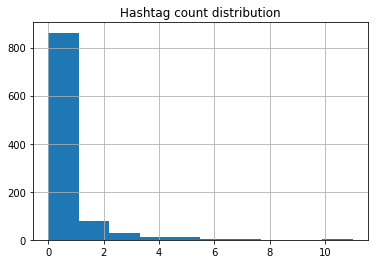

In [13]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()

    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]

    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

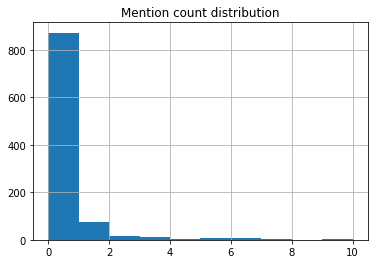

In [14]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()

    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]

    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

# Readability tests

* Readability test
    * Determine readability of an English passage
    * Scale ranging from primary school up to college graduate level
    * A mathematical formula utilizing word, syllable and sentence count
    * Used in fake news and opinion spam detection
* Examples
    * Flesch reading ease
    * Gunning fog index
    * Simple Measure of Gobbledygook (SMOG)
    * Dale-Chall score
* Flesch reading ease
    * One of the oldest and most widely used tests
    * Dependent on two factors
        * Greater the average sentence length, harder the text is to read
        * Greater the average number of syllables in a word, harder the text is to read
    * Higher the score, greater the readability
* Gunning fog index
    * Developed in 1954
    * Also dependent on average sentence length
    * Greater the percentage of complex words, harder the text is to read
    * Higher the index, lesser the readability



## Readability of 'The Myth of Sisyphus'

In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay The Myth of Sisyphus. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.

In [15]:
with open('dataset/sisyphus_essay.txt', 'r') as f:
    sisyphus_essay = f.read()
sisyphus_essay[:100]

'\\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the'

In [17]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

print("\nNotice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.")

The Flesch Reading Ease is 81.61

Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.


## Readability of various publications

In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:

    forbes- An excerpt from an article from Forbes magazine on the Chinese social credit score system.
    harvard_law- An excerpt from a book review published in Harvard Law Review.
    r_digest- An excerpt from a Reader's Digest article on flight turbulence.
    time_kids - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.


In [18]:
import glob
texts = []
text_list = glob.glob('dataset/*.txt')

text_list

['dataset\\blog.txt',
 'dataset\\forbes.txt',
 'dataset\\gettysburg.txt',
 'dataset\\harvard_law.txt',
 'dataset\\hey.txt',
 'dataset\\hopes.txt',
 'dataset\\lotf.txt',
 'dataset\\mother.txt',
 'dataset\\r_digest.txt',
 'dataset\\sisyphus_essay.txt',
 'dataset\\tc.txt',
 'dataset\\time_kids.txt']

In [20]:
file_list = ['time_kids', 'forbes', 'r_digest', 'harvard_law']
for text in text_list:
    for f in file_list:
        if f in text:
            with open(text, 'r',encoding="utf8") as f:
                texts.append(f.read())

time_kids, forbes, r_digest, harvard_law = texts

In [22]:
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
  readability_scores = Textatistic(excerpt).scores
  gunning_fog = readability_scores['gunningfog_score']
  gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)
print("\nNotice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.")

[20.735401069518716, 5.926785009861934, 11.085587583148559, 14.436002482929858]

Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.
